In [1]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [3]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [4]:
#Show the result

fin_result=time_evo(1000,0.5,0.1)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

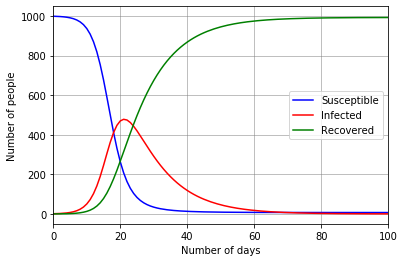

In [5]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [6]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [7]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 2708884
Total deaths: 190857
Total recovered: 738486
Based on the WHO data, the death rate is between 7.0 % and 20.5 % of the confirmed case


In [8]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

5.245879380258571
3.006990109358415


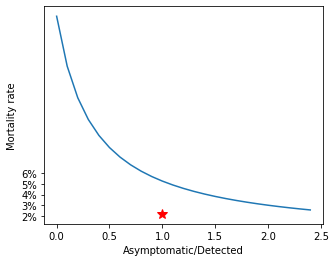

In [9]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [10]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [11]:
######## INPUT PARAMETERS ########
country='Germany'
t0=pd.to_datetime('2020-02-21')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Germany 153129
Total deaths Germany 5575
Total recovered  Germany 103300
Based on the WHO data, the death rate in Germany is between 3.6 % and 5.1 % of the total confirmed case


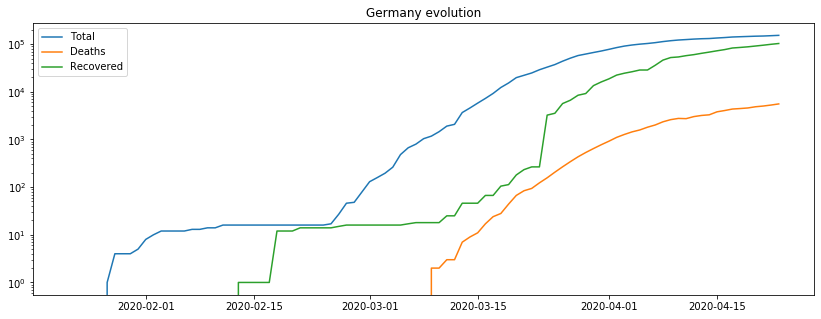

In [12]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
plt.savefig('country_plot.png',dpi=300)
plt.show()

In [13]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

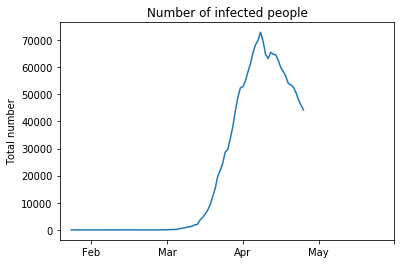

In [14]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
plt.savefig('activegermany.png',dpi=300)
plt.show()

In [15]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-02-21')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [16]:
print(whichcountry('Bosnia and Herzegovina')[1])#confirmed last day
print(whichcountry('Portugal')[2])#recovered last day

1413
1201


In [17]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,1279
1,Albania,663
2,Algeria,3007
3,Andorra,723
4,Angola,25
...,...,...
259,France,1
260,South Sudan,5
261,Western Sahara,6
262,Sao Tome and Principe,4


In [18]:
countries_list=['Albania',
                'Austria',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Latvia',
                'Lithuania',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'United Kingdom']

In [29]:
df_active=pd.DataFrame(whichcountry('Spain')[0])
df_active.columns=['Spain']
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Austria',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Latvia',
                'Lithuania',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'United Kingdom']

In [30]:
df_active.to_csv('active_infected',index=True)

In [31]:
data = pd.read_csv('active_infected')
#/Users/maddalena/Desktop/CovStat/
print(data)

    Unnamed: 0  Albania  Austria  Belgium  Bosnia and Herzegovina  Bulgaria  \
0   2020-01-22        0        0        0                       0         0   
1   2020-01-23        0        0        0                       0         0   
2   2020-01-24        0        0        0                       0         0   
3   2020-01-25        0        0        0                       0         0   
4   2020-01-26        0        0        0                       0         0   
..         ...      ...      ...      ...                     ...       ...   
88  2020-04-19   100864      222     3796                   24056       890   
89  2020-04-20    98771      231     3694                   25260       879   
90  2020-04-21   100382      238     3411                   25956       854   
91  2020-04-22   100757      251     3087                   26194       855   
92  2020-04-23   101617      251     2786                   26507       874   

    Croatia  Czechia  Denmark  Estonia  ...  Poland

In [32]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]


In [39]:
n_countries = len(countries_list)

In [40]:
today=len(xdata)

In [41]:
def minimizer(name,R0,t1=today-5,t2=today):
    array_country=whichcountry(name)[0]
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,0.1*R0,0.1,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [30]:
#time(minimizer('Spain', 3.0, 10, 20))

In [43]:
#definition of the ideal r0

xgrid=np.arange(0,2,0.01)
ygrid=minimizer_vec(countries_list[0],xgrid)
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [46]:
#time(round(xgrid[np.argmin(ygrid)],2))

In [33]:
#time(minimizer_vec('Spain',xgrid))

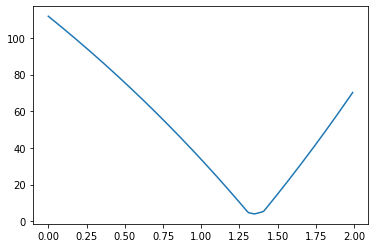

In [44]:
plt.plot(xgrid,ygrid)
plt.show()

In [48]:
#ydata_inf_2=np.array(ydata[today-5:today])
#xdata_2=np.arange(0,len(ydata_inf_2))

#fin_result=time_evo(60*10**6,0.1*r0_ideal,0.1,I0=ydata_inf_2[0])

In [49]:
t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

In [50]:
time_window=5

def minimizer_gen(name,t1,t2,xgrid):
    
    #xgrid=np.arange(1,11,0.01)
    ygrid=minimizer_vec(name,xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [1]:
#time(minimizer_vec('Spain', range(100),1, 5))

In [52]:
r0_time=[]
scangrid=np.linspace(0,5,50)

for name in countries_list:
     for i in range(today-(time_window-1)):
        min_val=minimizer_gen(name,i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+1,100)  #the grid changes over the time (this speeds up the process)
        print(i,min_val)
R0_countries.append([name, r0_time])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 1.0
48 2.0
49 3.0
50 3.07
51 2.3
52 2.1
53 2.1
54 1.72
55 1.73
56 1.88
57 2.07
58 2.17
59 2.37
60 2.28
61 2.02
62 2.01
63 1.76
64 1.25
65 1.45
66 1.36
67 1.19
68 1.33
69 1.39
70 1.64
71 1.68
72 1.62
73 1.24
74 0.81
75 0.68
76 0.8
77 0.8
78 0.82
79 0.9
80 0.98
81 1.12
82 1.13
83 1.29
84 1.04
85 1.13
86 1.01
87 1.26
88 1.35
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 1.0
35 2.0
36 3.0
37 4.0
38 3.94
39 3.44
40 3.77
41 4.29
42 4.22
43 3.95
44 3.95
45 3.75
46 3.65
47 4.18
48 4.24
49 4.18
50

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 1.0
40 2.0
41 3.0
42 4.0
43 5.0
44 3.64
45 2.53
46 2.46
47 2.31
48 3.31
49 3.61
50 4.47
51 3.09
52 2.93
53 2.7
54 2.69
55 2.76
56 2.89
57 2.75
58 2.27
59 2.31
60 2.07
61 2.48
62 2.85
63 2.92
64 2.53
65 2.57
66 1.98
67 1.69
68 1.6
69 1.68
70 1.73
71 1.68
72 1.57
73 1.43
74 1.45
75 1.44
76 1.4
77 1.43
78 1.37
79 1.32
80 1.34
81 1.32
82 1.36
83 1.45
84 1.21
85 1.25
86 1.3
87 1.3
88 1.28
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 1.0
44 2.0
45 2.7
46 3.7
47 4.7
48 4.2
49 4.1
50 3.09
51 3.18
52 2.66
53 2.33
54 3.33
55 4.33
56 4.09
57 2.98
58 2.53
59 2.92
60 2.06
61 2.26
62 2.07
63 2.45
64 2.51
65 2.34
66 2.5
67 2.16
68 2.14


58 2.03
59 2.02
60 1.74
61 1.91
62 1.94
63 1.66
64 1.69
65 1.52
66 1.4
67 1.38
68 1.32
69 1.38
70 1.15
71 1.09
72 0.93
73 1.01
74 0.75
75 0.55
76 0.56
77 0.52
78 0.43
79 0.4
80 0.49
81 0.24
82 0.09
83 0.0
84 0.0
85 0.05
86 0.02
87 0.09
88 0.0
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 1.0
39 2.0
40 3.0
41 4.0
42 3.89
43 4.35
44 1.51
45 2.51
46 3.01
47 4.01
48 4.2
49 3.78
50 4.68
51 3.1
52 2.77
53 3.69
54 4.5
55 4.22
56 4.32
57 2.74
58 2.64
59 2.76
60 2.81
61 2.58
62 2.53
63 2.42
64 2.18
65 2.02
66 1.89
67 1.96
68 1.91
69 1.85
70 1.93
71 1.83
72 1.72
73 1.7
74 1.66
75 1.67
76 2.13
77 2.18
78 2.31
79 1.91
80 1.85
81 1.84
82 1.72
83 1.62
84 1.53
85 1.46
86 0.0
87 0.0
88 0.0
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16

8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 1.0
45 1.01
46 1.02
47 2.02
48 3.02
49 4.02
50 4.06
51 2.5
52 2.09
53 2.78
54 3.13
55 3.42
56 3.44
57 3.5
58 3.05
59 2.86
60 2.38
61 2.53
62 2.57
63 2.74
64 2.76
65 2.73
66 2.03
67 2.11
68 2.48
69 2.46
70 2.45
71 2.61
72 2.26
73 2.37
74 2.11
75 1.88
76 1.8
77 1.78
78 1.83
79 1.89
80 1.93
81 1.98
82 1.9
83 1.46
84 1.32
85 1.15
86 1.37
87 1.24
88 1.11
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 1.0
45 2.0
46 3.0
47 4.0
48 5.0
49 5.7
50 5.01
51 3.22
52 2.81
53 3.04
54 2.94
55 3.26
56 2.37

NameError: name 'R0_countries' is not defined

In [1]:
#print(r0_time)

In [53]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
print(r0_countries0)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [1.01 0.33 1.3  ... 1.37 0.44 1.45]
 [1.26 0.44 1.3  ... 1.34 0.33 1.41]
 [1.35 0.31 1.28 ... 1.32 0.26 1.34]]


In [54]:
r0_countries=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-22'))

r0_countries.columns   = ['Albania',
                'Austria',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Latvia',
                'Lithuania',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'United Kingdom']
print(r0_countries)

            Albania  Austria  Belgium  Bosnia and Herzegovina  Bulgaria  \
2020-01-22     0.00     0.00     0.00                    0.00      0.00   
2020-01-23     0.00     0.00     0.00                    0.00      0.00   
2020-01-24     0.00     0.00     0.00                    0.00      0.00   
2020-01-25     0.00     0.00     0.00                    0.00      0.00   
2020-01-26     0.00     0.00     0.00                    0.00      0.00   
...             ...      ...      ...                     ...       ...   
2020-04-15     1.04     0.00     1.21                    1.22      1.39   
2020-04-16     1.13     0.03     1.25                    1.10      1.28   
2020-04-17     1.01     0.33     1.30                    1.12      1.27   
2020-04-18     1.26     0.44     1.30                    0.92      1.35   
2020-04-19     1.35     0.31     1.28                    0.87      1.50   

            Croatia  Czechia  Denmark  Estonia  Finland  ...  Poland  \
2020-01-22     0.00     0.0

In [61]:
r0_countries.to_csv('r0_countries_allinone.csv',index=True)

In [62]:
r0_countries_imp = pd.read_csv('r0_countries_allinone.csv')

In [65]:
print(r0_countries_imp.head())

   Unnamed: 0  Albania  Austria  Belgium  Bosnia and Herzegovina  Bulgaria  \
0  2020-01-22      0.0      0.0      0.0                     0.0       0.0   
1  2020-01-23      0.0      0.0      0.0                     0.0       0.0   
2  2020-01-24      0.0      0.0      0.0                     0.0       0.0   
3  2020-01-25      0.0      0.0      0.0                     0.0       0.0   
4  2020-01-26      0.0      0.0      0.0                     0.0       0.0   

   Croatia  Czechia  Denmark  Estonia  ...  Poland  Portugal  Romania  Serbia  \
0      0.0      0.0      0.0      0.0  ...     0.0       0.0      0.0     0.0   
1      0.0      0.0      0.0      0.0  ...     0.0       0.0      0.0     0.0   
2      0.0      0.0      0.0      0.0  ...     0.0       0.0      0.0     0.0   
3      0.0      0.0      0.0      0.0  ...     0.0       0.0      0.0     0.0   
4      0.0      0.0      0.0      0.0  ...     0.0       0.0      0.0     0.0   

   Slovakia  Slovenia  Spain  Sweden  Switze

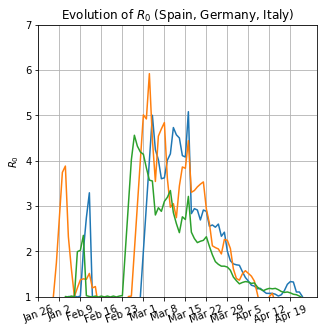

In [66]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['Spain'])
plt.plot(r0_countries_imp['Germany'])
plt.plot(r0_countries_imp['Italy'])
plt.xticks(np.arange(0-(time_window-5),90,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19'],rotation=20)
plt.xlim(0,today)
plt.ylabel('$R_0$')
plt.ylim(1,7)
plt.grid()
plt.title('Evolution of $R_0$ (Spain, Germany, Italy)')
#plt.savefig('output_countries/r0-evo_Spain.png',dpi=300)
plt.show()